  Reporting Period Home Performance Project ID Home Performance Site ID  \
0       06/30/2023                      568997                   414238   
1       06/30/2023                      558860                   395723   

  Project County Project City  Project Zip    Gas Utility Electric Utility  \
0           Erie         Eden        14057            NaN    National Grid   
1         Oswego       Fulton        13069  National Grid    National Grid   

  Project Completion Date Customer Type  ... Year Home Built  Size of Home  \
0              02/22/2023      Assisted  ...            1957         2,200   
1              12/09/2022      Assisted  ...            1912         1,024   

   Volume of Home Number of Units    Measure Type  \
0          17,600             1.0  Building Shell   
1           8,192             1.0  Building Shell   

  Estimated Annual kWh Savings Estimated Annual MMBtu Savings  \
0                          106                             16   
1             

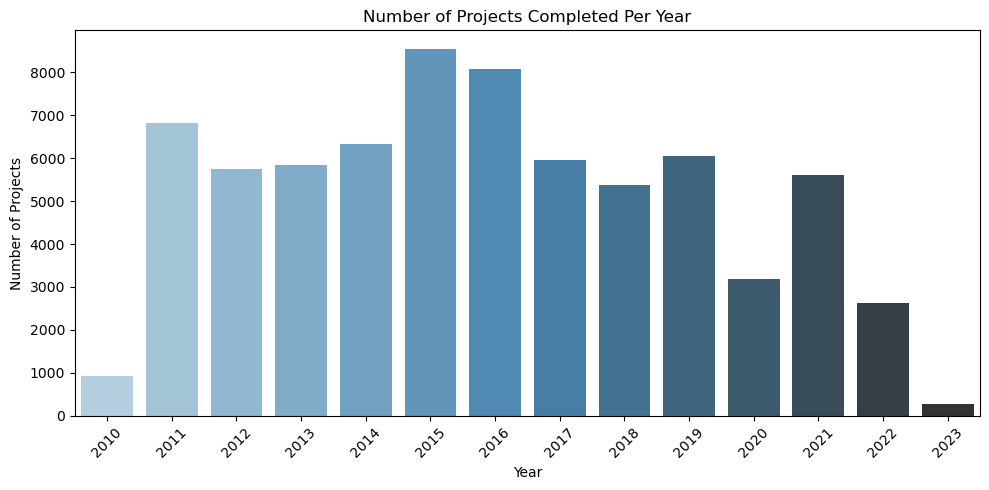

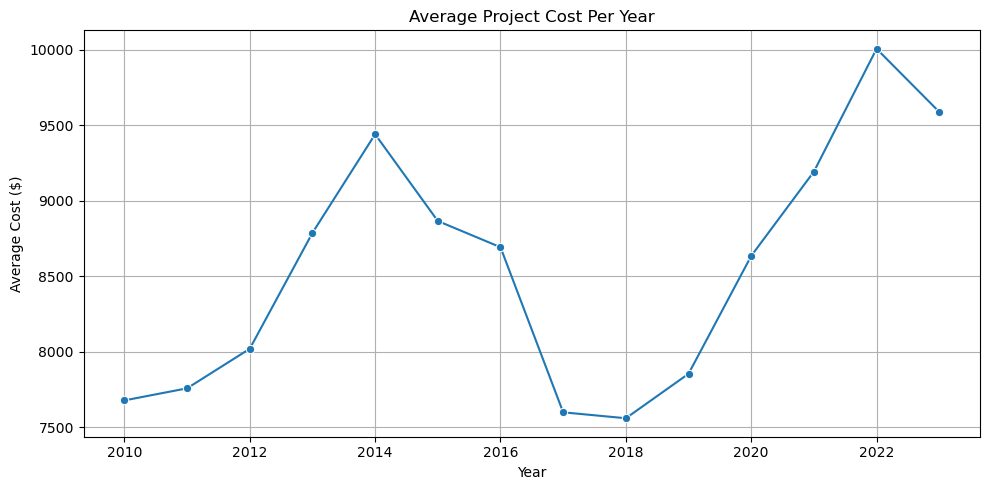

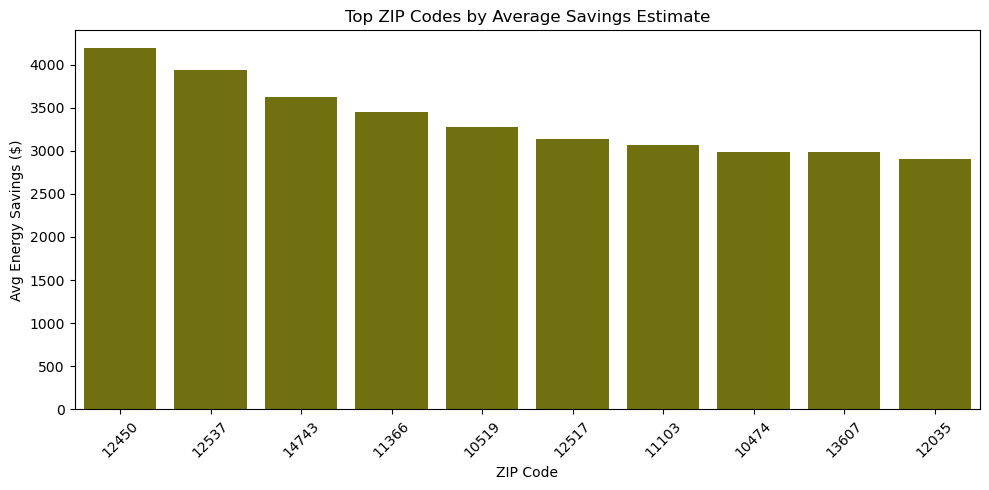

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("C:\\Users\\mrdip\\OneDrive\\Desktop\\Residential_Existing_Homes__One_to_Four_Units__Energy_Efficiency_Projects_with_Income-based_Incentives_by_Customer_Type__Beginning_2010_20250412.csv")
print(df.head(2))
print("Shape:", df.shape)
print("Missing values:\n", df.isnull().sum())
print("Duplicate rows:", df.duplicated().sum())
df = df.drop_duplicates()
df['Project Completion Date'] = pd.to_datetime(df['Project Completion Date'], errors='coerce')
df['Year'] = df['Project Completion Date'].dt.year
df['Month'] = df['Project Completion Date'].dt.month

projects_per_year = df['Year'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
sns.barplot(x=projects_per_year.index,
            y=projects_per_year.values,
            hue=projects_per_year.index,
            palette='Blues_d',
            legend=False)
plt.title("Number of Projects Completed Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Projects")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
avg_cost_per_year = df.groupby('Year')['Total Project Cost'].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(x=avg_cost_per_year.index,
             y=avg_cost_per_year.values,
             marker='o')
plt.title("Average Project Cost Per Year")
plt.xlabel("Year")
plt.ylabel("Average Cost ($)")
plt.grid(True)
plt.tight_layout()
plt.show()
top_zips = df.groupby('Project Zip')['First Year Energy Savings $ Estimate'] \
             .mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_zips.index.astype(str),
            y=top_zips.values,
            color='olive')
plt.title("Top ZIP Codes by Average Savings Estimate")
plt.xlabel("ZIP Code")
plt.ylabel("Avg Energy Savings ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


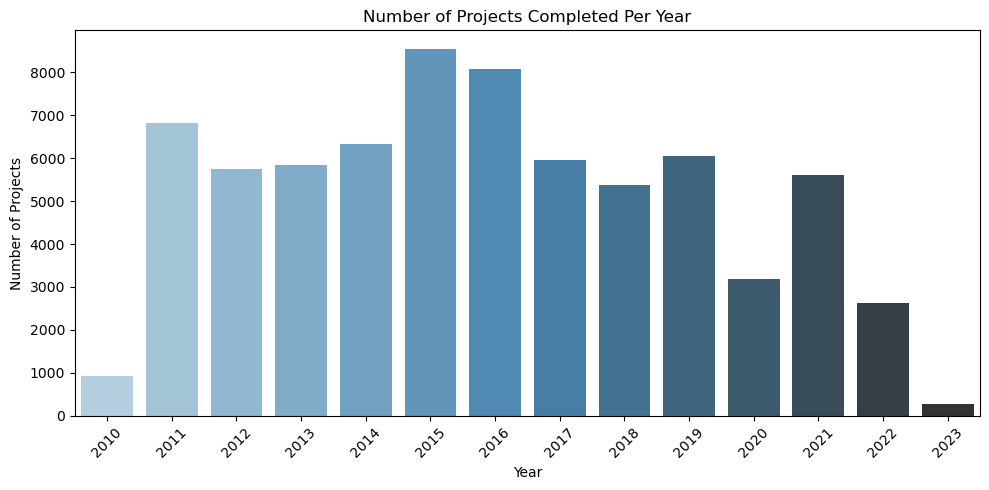

In [24]:
projects_per_year = df['Year'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.barplot(x=projects_per_year.index,
            y=projects_per_year.values,
            hue=projects_per_year.index,
            palette='Blues_d',
            legend=False)
plt.title("Number of Projects Completed Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Projects")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


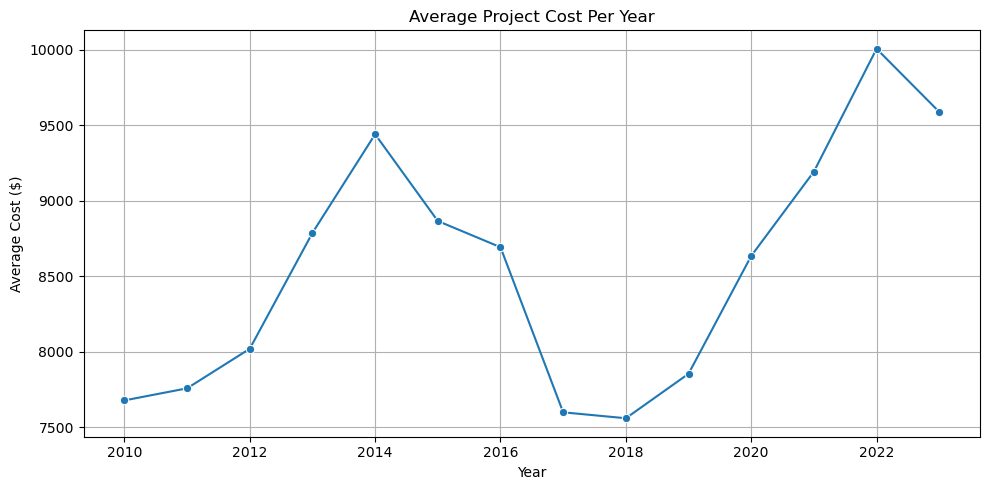

In [26]:
avg_cost_per_year = df.groupby('Year')['Total Project Cost'].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(x=avg_cost_per_year.index,
             y=avg_cost_per_year.values,
             marker='o')
plt.title("Average Project Cost Per Year")
plt.xlabel("Year")
plt.ylabel("Average Cost ($)")
plt.grid(True)
plt.tight_layout()
plt.show()


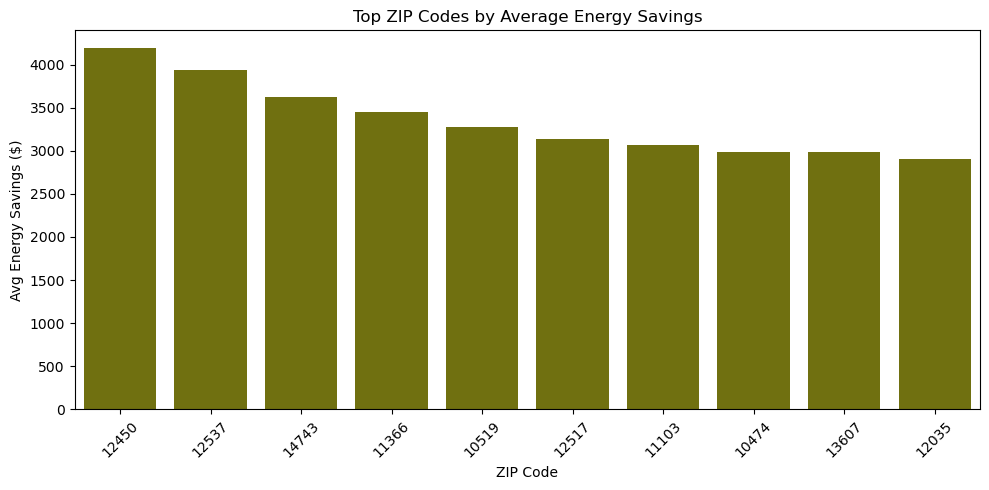

In [28]:
top_zips = df.groupby('Project Zip')['First Year Energy Savings $ Estimate'] \
             .mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_zips.index.astype(str),
            y=top_zips.values,
            color='olive')
plt.title("Top ZIP Codes by Average Energy Savings")
plt.xlabel("ZIP Code")
plt.ylabel("Avg Energy Savings ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


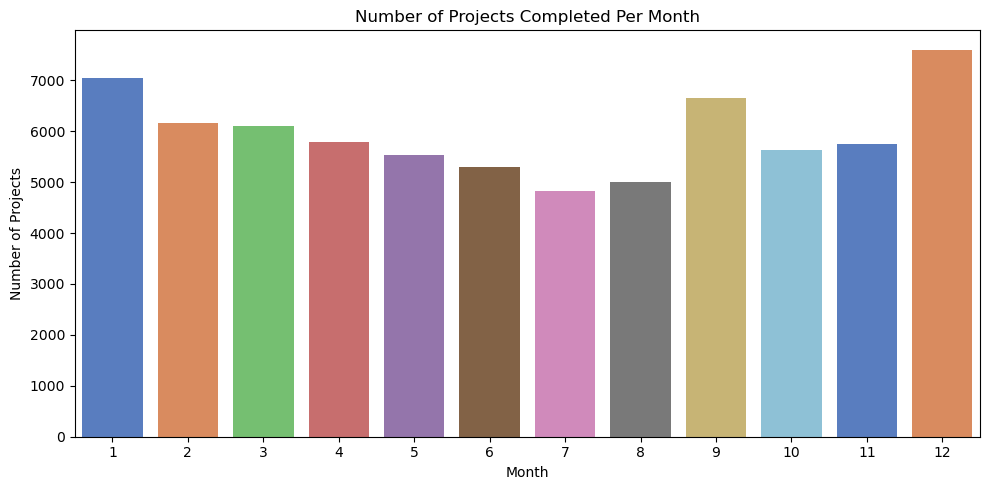

In [38]:
# Ensure Month column is present
df['Month'] = pd.to_datetime(df['Project Completion Date'], errors='coerce').dt.month

# Number of projects per month
projects_per_month = df['Month'].value_counts().sort_index()

# Plot with updated syntax to remove warning
plt.figure(figsize=(10, 5))
sns.barplot(x=projects_per_month.index,
            y=projects_per_month.values,
            hue=projects_per_month.index,  # Assign x as hue
            palette='muted',
            legend=False)  # Disable legend
plt.title("Number of Projects Completed Per Month")
plt.xlabel("Month")
plt.ylabel("Number of Projects")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


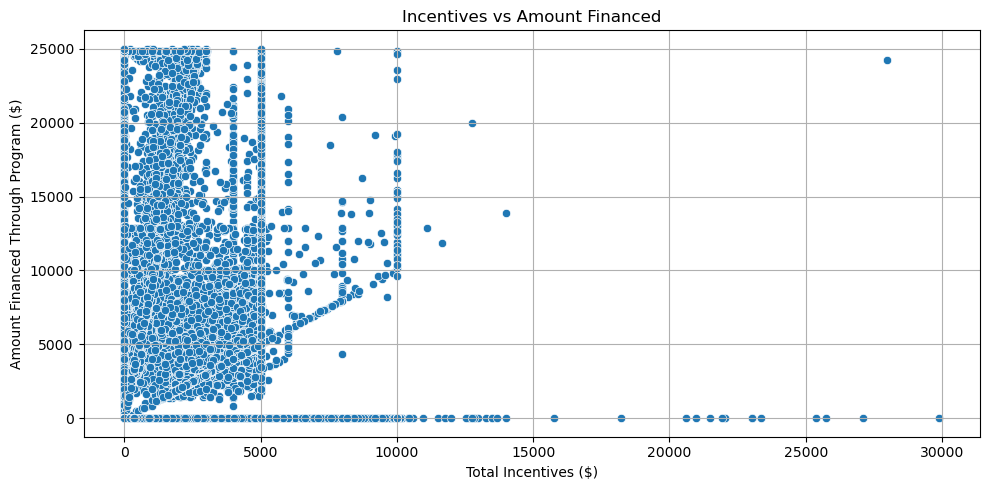

In [32]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Total Incentives',
                y='Amount Financed Through Program',
                data=df)
plt.title("Incentives vs Amount Financed")
plt.xlabel("Total Incentives ($)")
plt.ylabel("Amount Financed Through Program ($)")
plt.grid(True)
plt.tight_layout()
plt.show()


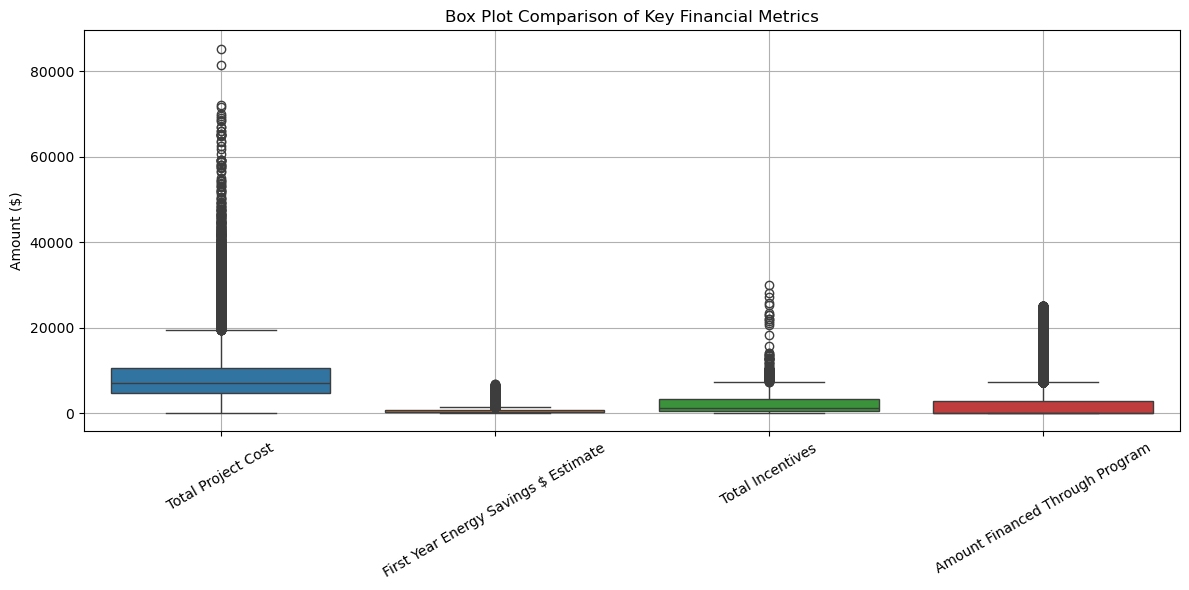

In [40]:

cols_to_plot = [
    'Total Project Cost',
    'First Year Energy Savings $ Estimate',
    'Total Incentives',
    'Amount Financed Through Program'
]
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[cols_to_plot])
plt.title("Box Plot Comparison of Key Financial Metrics")
plt.ylabel("Amount ($)")
plt.xticks(rotation=30)
plt.grid(True)
plt.tight_layout()
plt.show()
